<a href="https://colab.research.google.com/github/JLee823/2023-1st-AI-assisted-drug-discovery-SNU/blob/main/Week1_Quick_start_Introduction_to_machine_learning_for_drug_discovery_2023_1st_SNU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
인공 지능 기반 신약 개발 수업에 관심을 가져주셔서 감사합니다. 

1주차에서는 아주 기본적인 머신 러닝의 흐름을 실습해보는 시간을 가지도록 하겠습니다. 

각 코드의 자세한 내용은 앞으로 수업이 진행되면서 조금 더 자세히 설명하도록 하겠습니다. 

------


# Predicting activity of JAK2 inhibitors
## Goal of the class
* Practice the **regression model** using biological data

## Janus kinase
Janus kinase (JAK) is a family of intracellular, non-receptor tyrosine kinases that transduce cytokine-mediated signals via the JAK-STAT pathway. They were initially named "just another kinase" 1 and 2 (since they were just two of many discoveries in a PCR-based screen of kinases),[1] but were ultimately published as "Janus kinase". The name is taken from the two-faced Roman god of beginnings, endings and duality, Janus, because the JAKs possess two near-identical phosphate-transferring domains. One domain exhibits the kinase activity, while the other negatively regulates the kinase activity of the first.

![picture](https://upload.wikimedia.org/wikipedia/commons/thumb/3/35/Protein_JAK2_PDB_2b7a.png/500px-Protein_JAK2_PDB_2b7a.png)

## Collecting activity data of JAK2
-----

JAK2의 activity data는 [ChEMBL](https://www.ebi.ac.uk/chembl/) 사이트에서 받을 수 있다. 




<img width="500" src="https://www.dropbox.com/s/h1k4sr23qu93dit/ChEMBL1.png?raw=1">

<img width="500" src="https://www.dropbox.com/s/4lb5d853ut2mxtg/ChEMBL2.png?raw=1">

Assay로 search를 하면 다양한 compound assay 실험 결과 데이터를 검색할 수 있다. 

<img width="500" src="https://www.dropbox.com/s/790whkk92wv0ssw/ChEMBL3.png?raw=1">

검색 결과 다양한 assay결과들이 검색되었다. 

각 assay 데이터를 다운 받아서 통합하는 일이 필요하다...... 

자세한 것은 차차 다루도록 한다.

In [1]:
import pandas as pd

데이터를 다루기 위해서 Pandas 라이브러리를 import 한다. 

https://pandas.pydata.org/

Pandas 라이브러리는 colab 이나 Jupyter notebook에서 excel과 유사하게 데이터를 다룰 수 있도록 해주는 library이다. 

Pandas에 대한 자세한 설명은 아래의 Pandas tutorial을 참고해주시길 바랍니다. 

https://pandas.pydata.org/docs/user_guide/10min.html

https://codetorial.net/pandas/index.html



In [4]:
df = pd.read_csv("jak2_data.csv")

## IC50 
The **half maximal inhibitory concentration (IC50)** is a measure of the potency of a substance in inhibiting a specific biological or biochemical function. 

IC50 is a quantitative measure that indicates **how much of a particular inhibitory substance (e.g. drug) is needed to inhibit, in vitro, a given biological process or biological component by 50%.** 

The biological component could be an enzyme, cell, cell receptor or microorganism. IC50 values are typically expressed as molar concentration.

**In general, the IC50 value of a typical drug is around several nM.**

pIC50 = -log_10(IC50)

In [5]:
df

,SMILES,pIC50
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59
...,...,...
1906,CC(=O)N1CCCCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.72
1907,CN1CCN(c2ncc(-c3cnc4[nH]ccc4n3)c(NC3CCCN(S(=O)...,10.76
1908,CC1CN(S(=O)(=O)CC2CCC(N(C)c3[nH]cnc4nccc3-4)CC...,10.78
1909,CS(=O)(=O)N1CCC(Nc2ncccc2-c2cnc3[nH]ccc3n2)C1,10.97


In [6]:
df.describe()

,pIC50
count,1911.000000
mean,7.391544
std,1.180905
min,4.260000
25%,6.650000
50%,7.380000
75%,8.100000
max,10.970000


array([[<AxesSubplot:title={'center':'pIC50'}>]], dtype=object)

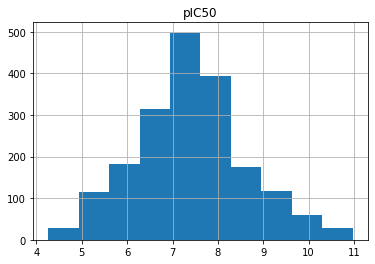

In [7]:
df.hist("pIC50")

In [8]:
pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 32.7 MB/s eta 0:00:00
